<a href="https://colab.research.google.com/github/kevGamer09-glitch/TAREA-3/blob/main/PREDIT_BITCOIN_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predecir el precio de Bitcoin

In [2]:
#Este código carga un archivo CSV con datos de Bitcoin, ordena las filas por el índice de forma descendente y muestra las primeras filas del DataFrame.
import pandas as pd

_df = pd.read_csv("https://gist.githubusercontent.com/mevangelista-alvarado/6f4f28c00f9e683108637cb3c8d5db89/raw/1ce753283fce23eeab952fa1d660a7069bbe9104/Bitcoin_1_1_2024-6_9_2024_historical_data_coinmarketcap.csv", delimiter=';')
# Ordenamos correctamente
_df = _df.sort_index(ascending=False)
_df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
158,2024-01-03T00:00:00.000Z,2024-01-03T23:59:59.999Z,2024-01-03T09:40:00.000Z,2024-01-03T12:10:00.000Z,2781,44961.603187,45503.241795,40813.534868,42848.175641,4.634232e+10,8.393459e+11,2024-01-03T23:59:59.999Z
157,2024-01-04T00:00:00.000Z,2024-01-04T23:59:59.999Z,2024-01-04T22:22:00.000Z,2024-01-04T01:26:00.000Z,2781,42855.814761,44770.023414,42675.174007,44179.921701,3.044809e+10,8.654825e+11,2024-01-04T23:59:59.999Z
156,2024-01-05T00:00:00.000Z,2024-01-05T23:59:59.999Z,2024-01-05T23:07:00.000Z,2024-01-05T01:49:00.000Z,2781,44192.978699,44353.285859,42784.718266,44162.691630,3.233603e+10,8.651827e+11,2024-01-05T23:59:59.999Z
155,2024-01-06T00:00:00.000Z,2024-01-06T23:59:59.999Z,2024-01-06T00:10:00.000Z,2024-01-06T07:07:00.000Z,2781,44178.954607,44227.631307,43475.156431,43989.194093,1.609250e+10,8.618220e+11,2024-01-06T23:59:59.999Z
154,2024-01-07T00:00:00.000Z,2024-01-07T23:59:59.999Z,2024-01-07T14:09:00.000Z,2024-01-07T23:45:00.000Z,2781,43998.464243,44495.571471,43662.228627,43943.097229,1.933057e+10,8.609518e+11,2024-01-07T23:59:59.999Z


In [3]:
#Contienen fechas y horas de apertura, cierre, máximo y mínimo; el nombre del activo; y sus valores de precio, volumen, capitalización de mercado y timestamp asociado.
'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
'low', 'close', 'volume', 'marketCap', 'timestamp'

('low', 'close', 'volume', 'marketCap', 'timestamp')

In [4]:
#crea un nuevo DataFrame llamado df que solo conserva cinco columnas del original: timeOpen, open, high, low y close.
df = _df[['timeOpen', 'open', 'high', 'low', 'close']]

In [5]:
#extrae solo la columna close del DataFrame y la convierte a un array de valores numéricos (numpy).
dates = df[['close']].values

Escalar los valores

In [6]:
#crea un escalador MinMax que normaliza los valores entre 0 y 1, y luego transforma los datos de cierre (dates) a esa escala.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dates)

secuencias

In [7]:
#define una ventana de 60 datos, normalmente usada para crear secuencias de entrada en modelos de series de tiempo (como LSTM).
window_size = 60

In [8]:
#define una función que crea secuencias de 60 datos para entrenar un modelo de series de tiempo.
import numpy as np

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        # El precio es la primera columna
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, window_size)

conjunto de entrenamiento y prueba

In [9]:
#divide los datos en entrenamiento (80%) y prueba (20%), separando tanto las secuencias X como las etiquetas y.
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

modelo RNN

In [10]:
#construye un modelo de red neuronal recurrente (RNN) para series de tiempo:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=120, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(SimpleRNN(units=60, return_sequences=False))
model.add(Dense(units=30))
model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


entrenamiento y copilacion

In [12]:
#compila y entrena el modelo RNN usa el optimizador Adam con tasa de aprendizaje 0.001
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4013
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0209
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0108
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0221
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0147
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0110
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052


testing

In [14]:
# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar los datos predichos
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


calculo de metricas

In [15]:
#calcula y muestra el desempeño del modelo en los datos de prueba
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 2554.373702960887
RMSE: 2885.7342229284864


graficar los resultados

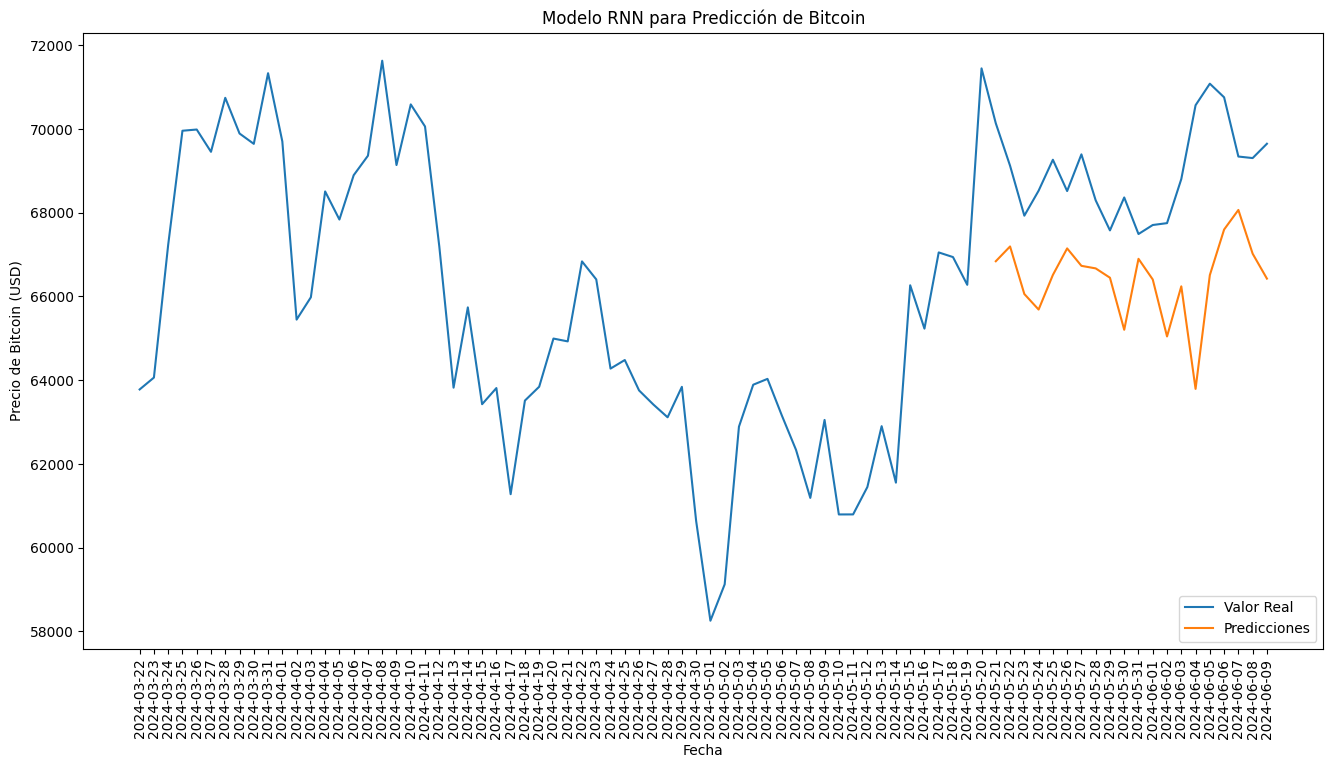

In [16]:
#grafica los resultados del modelo RNN prepara el DataFrame de validación, reiniciando el índice y agregando una columna para las predicciones.
import matplotlib.pyplot as plt
import numpy as np

valid = df[split:]
# Reiniciar el índice del DataFrame de validación
valid = valid.reset_index(drop=True)
# Inicializar la columna de predicciones con NaN
valid['Predictions'] = np.nan

# Añadir las predicciones al DataFrame de validación desde el punto donde inician las predicciones
valid.loc[window_size:, 'Predictions'] = predictions
dates_valid = pd.to_datetime(valid['timeOpen']).apply(lambda x: x.strftime('%Y-%m-%d')).tolist()

plt.figure(figsize=(16,8))
plt.title('Modelo RNN para Predicción de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']])
plt.legend(['Valor Real', 'Predicciones'], loc='lower right')
plt.xticks(rotation=90)
plt.show()

prediccion de valores nuevos

In [18]:
# Generar secuencias para los siguientes días
future_sequences = []
# Última secuencia de los valores que tenemos
last_sequence = X[-1]

days = 10
for _ in range(days):
    # Predecir el siguiente valor
    next_value = model.predict(np.array([last_sequence]))[0, 0]

    # Actualizar la secuencia para la siguiente predicción
    last_sequence = np.concatenate((last_sequence[1:], [[next_value]]), axis=0)

    # Añadir la nueva secuencia a las secuencias futuras
    future_sequences.append(last_sequence)

# Convertir las secuencias futuras a un numpy y reshape para la RNN
future_sequences = np.array(future_sequences)
future_sequences = np.reshape(future_sequences, (future_sequences.shape[0], future_sequences.shape[1], 1))

# Hacer predicciones para los siguientes días
future_predictions = model.predict(future_sequences)

# Desescalar los datos predichos para los siguientes días
future_predictions = scaler.inverse_transform(np.concatenate((future_predictions, np.zeros((future_predictions.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


generar fechas para los siguinetes dias

In [19]:
#genera fechas futuras para predicciones toma la última fecha disponible en el DataFrame
# Última fecha en los datos reales
last_date = df['timeOpen'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=days)[1:]
future_dates = future_dates.strftime('%Y-%m-%d').tolist()

graficar los resultados de los 30 dias

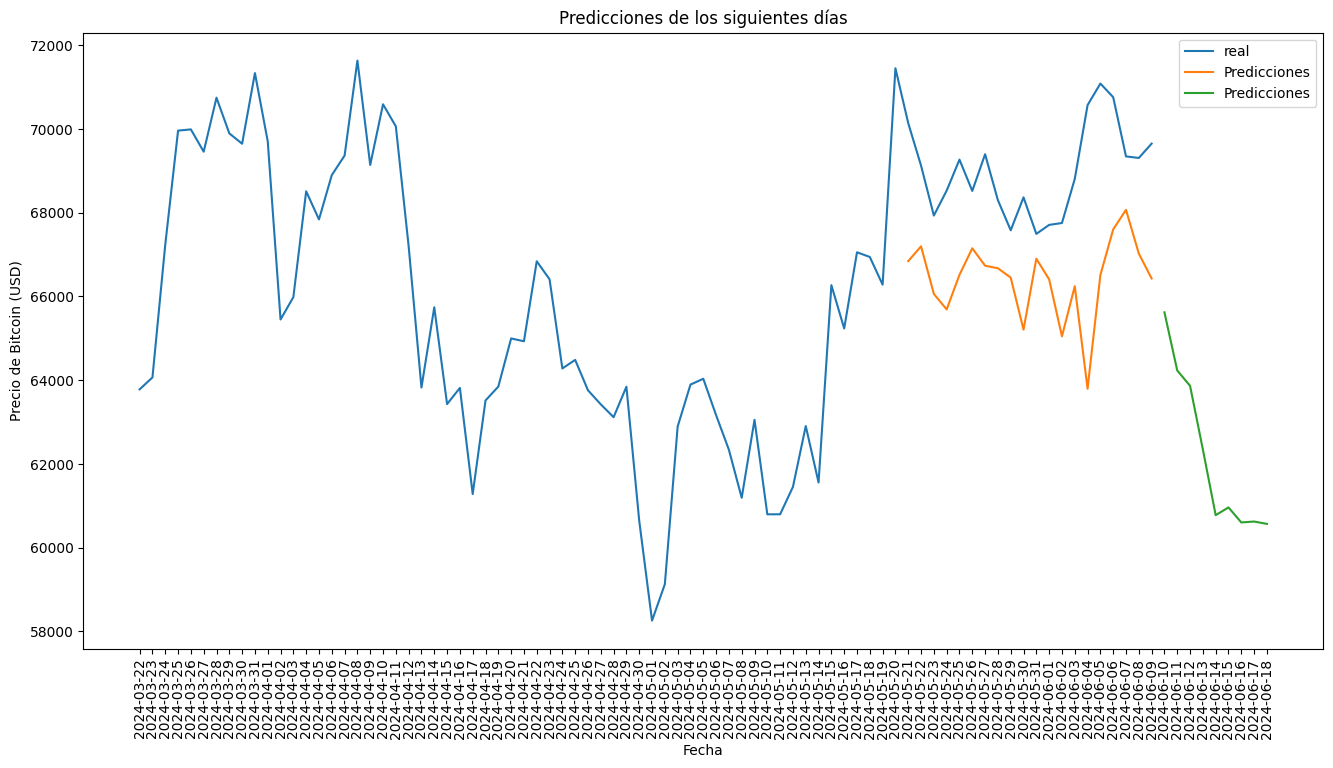

In [20]:
#grafica las predicciones futuras del precio de Bitcoin muestra los valores reales y predicciones pasadas
plt.figure(figsize=(16,8))
plt.title('Predicciones de los siguientes días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']], label=['real', 'Predicciones'])
plt.plot(future_dates, future_predictions[:-1], label='Predicciones')
plt.legend()
plt.xticks(rotation=90)
plt.show()